# **Dataset Global Power Plant**


**Grupo 4** : Mariela Abrego, Melisa Braile, Mariana Grau, Micaela Melian

La base de datos *Global Power Plant* fue creada a partir de datos gubernamentales oficiales y fuentes independientes de todo el mundo. Los datos están publicados en diversos sitios web. Recopila las principales características e indicadores:

-Combustibles

-Caracteristicas técnicas (combustible, tecnología, propiedad)

-Caracteristicas operativas (Generación)

-Geolocalización de plantas

-Plantas de más de un megavatio (mw)

-Plantas en operación solamente


**Objetivo**: Analizar la producción de energía a nivel global a partir de la base de datos *Global Power Plant*. Se buscará entender la diversidad de fuentes de energía por país. El análisis empezará en Argentina y luego se realizará una comparación de las plantas con mayor y menor producción de energía a nivel mundial.


Los principales aspectos a explorar son:

-Comparar cuanto aporta cada fuente de energia sobre el total.

-Cuál es la fuente que produce más energía a nivel global y cuál es la que produce menos energía en el año 2017.

-Cuál es el país que más energía produce.

-Cuál es el país que más energía produce de cada fuente.

-Determinar la capacidad ociosa.

-En qué region se produce la mayor cantidad de energía y por qué fuente.

In [1]:
#importa numpy
import numpy as np
#importa pandas
import pandas as pd
#Importa las librerias matplotlib, seaborn y Scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
#Al importar el dataset aparece un error que tiene que ver con que el archivo tiene features con un tipo de dato mixto (por ejemplo 
#combina enteros y strings), es por eso que en el código se agrega al final el low_memory=False, lo que permite que se pueda
#leer el archivo csv sin problemas)

GlobalPowerPlant = pd.read_csv('global_power_plant_database.csv',low_memory=False)
                               


## **Análisis Exploratorio de Datos**

In [3]:
# Lo primero que queremos saber es cuantas filas tiene el dataframe, para eso utilizamos la funcion index.

GlobalPowerPlant.index


RangeIndex(start=0, stop=34936, step=1)

In [4]:
#Accedemos al tipo de estrutura de datos con el type.
type(GlobalPowerPlant)

pandas.core.frame.DataFrame

In [5]:
# El .shape nos permite saber la cantidad de filas y columnas que tiene GlobalPowerPlant.

GlobalPowerPlant.shape
print("La base de datos GlobalPowerPlant esta formada por", GlobalPowerPlant.shape, " filas y columnas respectivamente.")

La base de datos GlobalPowerPlant esta formada por (34936, 36)  filas y columnas respectivamente.


In [6]:
#Con el .columns accedemos al nombre de las columnas que contiene GlobalPowerPlant.

GlobalPowerPlant.columns
print("El nombre de las columnas que contiene la base de datos de GlobalPowerPlant son", GlobalPowerPlant.columns)

El nombre de las columnas que contiene la base de datos de GlobalPowerPlant son Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
       'estimated_generation_gwh_2017', 'estimated_generation_note_2013',
       'estimated_generation_note_2014', 'estimated_generation_note_2015',
       'estimated_generation_note_2016', 'estimated_generation_note_2017'],
      dtype='object')


In [7]:
#Usamos.rename para renombrar las columnas de GlobalPowerPlant.

GlobalPowerPlant.rename(columns={'country' : 'Country',
                                 'country_long':'Country Long',
                                 'name':'Name',
                                 'gppd_idnr':'Gppd Idnr',
                                 'capacity_mw':'Capacity MW',
                                 'latitude':'Latitude',
                                 'longitude':'Longitude',
                                 'primary_fuel':'Primary Fuel',
                                 'other_fuel1':'Other Fuel 1',
                                 'other_fuel2':'Other Fuel 2',
                                 'other_fuel3':'Other Fuel 3',
                                 'commissioning_year':'Commissioning Year',
                                 'owner':'Owner',
                                 'source':'Source',
                                 'url':'URL',
                                 'geolocation_source':'Geolocation Source',
                                 'wepp_id':'Wepp ID',
                                 'year_of_capacity_data':'Year of Capacity Data',
                                 'generation_gwh_2013':'Generation GWH 2013',
                                 'generation_gwh_2014':'Generation GWH 2014',
                                 'generation_gwh_2015':'Generation GWH 2015',
                                 'generation_gwh_2016':'Generation GWH 2016',
                                 'generation_gwh_2017':'Generation GWH 2017',
                                 'generation_gwh_2018':'Generation GWH 2018',
                                 'generation_gwh_2019':'Generarion GWH 2019',
                                 'generation_data_source':'Generation Data Source',
                                 'estimated_generation_gwh_2013':'Estimated Generation GWH 2013',
                                 'estimated_generation_gwh_2014':'Estimated Generation GWH 2014',
                                 'estimated_generation_gwh_2015':'Estimated Generation GWH 2015',
                                 'estimated_generation_gwh_2016':'Estimated Generation GWH 2016',
                                 'estimated_generation_gwh_2017':'Estimated Generation GWH 2017',
                                 'estimated_generation_note_2013':'Estimated Generation Note 2013',
                                 'estimated_generation_note_2014':'Estimated Generation Note 2014',
                                 'estimated_generation_note_2015':'Estimated Generation Note 2015',
                                 'estimated_generation_note_2016':'Estimated Generation Note 2016',
                                 'estimated_generation_note_2017':'Estimated Generation Note 2017'}, inplace=True)
GlobalPowerPlant.columns

Index(['Country', 'Country Long', 'Name', 'Gppd Idnr', 'Capacity MW',
       'Latitude', 'Longitude', 'Primary Fuel', 'Other Fuel 1', 'Other Fuel 2',
       'Other Fuel 3', 'Commissioning Year', 'Owner', 'Source', 'URL',
       'Geolocation Source', 'Wepp ID', 'Year of Capacity Data',
       'Generation GWH 2013', 'Generation GWH 2014', 'Generation GWH 2015',
       'Generation GWH 2016', 'Generation GWH 2017', 'Generation GWH 2018',
       'Generarion GWH 2019', 'Generation Data Source',
       'Estimated Generation GWH 2013', 'Estimated Generation GWH 2014',
       'Estimated Generation GWH 2015', 'Estimated Generation GWH 2016',
       'Estimated Generation GWH 2017', 'Estimated Generation Note 2013',
       'Estimated Generation Note 2014', 'Estimated Generation Note 2015',
       'Estimated Generation Note 2016', 'Estimated Generation Note 2017'],
      dtype='object')

In [8]:
#.dtypes nos permite saber el tipo de datos que contienen las columnas de GlobalPowerPlant

GlobalPowerPlant.dtypes

Country                            object
Country Long                       object
Name                               object
Gppd Idnr                          object
Capacity MW                       float64
Latitude                          float64
Longitude                         float64
Primary Fuel                       object
Other Fuel 1                       object
Other Fuel 2                       object
Other Fuel 3                       object
Commissioning Year                float64
Owner                              object
Source                             object
URL                                object
Geolocation Source                 object
Wepp ID                            object
Year of Capacity Data             float64
Generation GWH 2013               float64
Generation GWH 2014               float64
Generation GWH 2015               float64
Generation GWH 2016               float64
Generation GWH 2017               float64
Generation GWH 2018               

In [9]:
#Tranformamos los tipos de datos object por strings.

GlobalPowerPlant['Country'] = GlobalPowerPlant['Country'].astype("string")
GlobalPowerPlant['Country Long'] = GlobalPowerPlant['Country Long'].astype("string")
GlobalPowerPlant['Name'] = GlobalPowerPlant['Name'].astype("string")
GlobalPowerPlant['Gppd Idnr'] = GlobalPowerPlant['Gppd Idnr'].astype("string")
GlobalPowerPlant['Primary Fuel'] = GlobalPowerPlant['Primary Fuel'].astype("string")
GlobalPowerPlant['Other Fuel 1'] = GlobalPowerPlant['Other Fuel 1'].astype("string")
GlobalPowerPlant['Other Fuel 2'] = GlobalPowerPlant['Other Fuel 2'].astype("string")
GlobalPowerPlant['Other Fuel 3'] = GlobalPowerPlant['Other Fuel 3'].astype("string")
GlobalPowerPlant['Owner'] = GlobalPowerPlant['Owner'].astype("string")
GlobalPowerPlant['Source'] = GlobalPowerPlant['Source'].astype("string")
GlobalPowerPlant['URL'] = GlobalPowerPlant['URL'].astype("string")
GlobalPowerPlant['Geolocation Source'] = GlobalPowerPlant['Geolocation Source'].astype("string")
GlobalPowerPlant['Wepp ID'] = GlobalPowerPlant['Wepp ID'].astype("string")
GlobalPowerPlant['Generation Data Source'] = GlobalPowerPlant['Generation Data Source'].astype("string")
GlobalPowerPlant['Estimated Generation Note 2013'] = GlobalPowerPlant['Estimated Generation Note 2013'].astype("string")
GlobalPowerPlant['Estimated Generation Note 2014'] = GlobalPowerPlant['Estimated Generation Note 2014'].astype("string")
GlobalPowerPlant['Estimated Generation Note 2015'] = GlobalPowerPlant['Estimated Generation Note 2015'].astype("string")
GlobalPowerPlant['Estimated Generation Note 2016'] = GlobalPowerPlant['Estimated Generation Note 2016'].astype("string")
GlobalPowerPlant['Estimated Generation Note 2017'] = GlobalPowerPlant['Estimated Generation Note 2017'].astype("string")

In [10]:
#La columna Commissioning Year presenta valores nulos y los años con decimales (float), es por eso que convertimos el tipo de datos Float en un Int
# Primero reemplazamos los valores nulos con un año predeterminado, en este caso al no tener el dato usamos el número 0
GlobalPowerPlant['Commissioning Year'] = GlobalPowerPlant['Commissioning Year'].fillna(0)

#Después convertimos el tipo de dato Float en Int
GlobalPowerPlant['Commissioning Year'] = GlobalPowerPlant['Commissioning Year'].apply(np.floor).astype(int)


In [11]:
#Usamos .info para tener un detalle más completo de la info del dataset, por ejemplo:El número total de filas y columnas en el DataFrame,
#Los nombres de las columnas, la cantidad de valores no nulos en cada columna, el tipo de dato de cada columna,
#la cantidad de memoria utilizada por el DataFrame.

GlobalPowerPlant.info () 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         34936 non-null  string 
 1   Country Long                    34936 non-null  string 
 2   Name                            34936 non-null  string 
 3   Gppd Idnr                       34936 non-null  string 
 4   Capacity MW                     34936 non-null  float64
 5   Latitude                        34936 non-null  float64
 6   Longitude                       34936 non-null  float64
 7   Primary Fuel                    34936 non-null  string 
 8   Other Fuel 1                    1944 non-null   string 
 9   Other Fuel 2                    276 non-null    string 
 10  Other Fuel 3                    92 non-null     string 
 11  Commissioning Year              34936 non-null  int32  
 12  Owner                           

In [12]:
#Luego realizamos un detalle estadístico de las columnas numéricas aplicando .describe().
GlobalPowerPlant.describe()

,Capacity MW,Latitude,Longitude,Commissioning Year,Year of Capacity Data,Generation GWH 2013,Generation GWH 2014,Generation GWH 2015,Generation GWH 2016,Generation GWH 2017,Generation GWH 2018,Generarion GWH 2019,Estimated Generation GWH 2013,Estimated Generation GWH 2014,Estimated Generation GWH 2015,Estimated Generation GWH 2016,Estimated Generation GWH 2017
count,34936.000000,34936.000000,34936.000000,34936.000000,14887.000000,6417.000000,7226.000000,8203.000000,9144.000000,9500.000000,9637.000000,9659.000000,16120.000000,16503.000000,17050.000000,17570.000000,33138.000000
mean,163.355148,32.816637,-6.972803,997.477817,2018.218849,592.696107,656.863891,762.368840,693.149763,661.834161,517.320785,423.922436,239.112221,242.431122,235.866067,235.695265,716.443378
std,489.636072,22.638603,78.405850,998.829311,1.606428,2174.833482,2231.464288,2533.459828,2404.516759,2369.296957,1975.302686,1698.506485,1191.258172,1285.798297,1267.005223,1259.559841,2484.361200
min,1.000000,-77.847000,-179.977700,0.000000,2000.000000,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000,-780.339000,1.120000,0.870000,0.440000,0.300000,0.000000
25%,4.900000,29.256475,-77.641550,0.000000,2017.000000,1.947000,2.260000,2.664500,2.729000,2.467000,2.242000,2.751500,8.620000,8.680000,8.380000,8.322500,8.180000
50%,16.745000,39.727750,-2.127100,0.000000,2019.000000,23.426000,23.608500,26.142000,22.462389,17.876500,12.530000,11.530000,27.620000,28.250000,26.830000,27.555000,37.590000
75%,75.344250,46.263125,49.502675,2007.000000,2019.000000,199.706000,226.322250,285.862583,249.866750,214.505150,151.117000,122.781498,106.805000,106.980000,103.120000,107.237500,229.565000
max,22500.000000,71.292000,179.388700,2020.000000,2019.000000,50834.000000,32320.917000,37433.607000,32377.477000,36448.643000,35136.000000,31920.368000,48675.060000,58470.770000,57113.350000,60859.730000,82810.770000


In [13]:
#Usamos .head para ver las primeras filas del dataset.
GlobalPowerPlant.head(100)

,Country,Country Long,Name,Gppd Idnr,Capacity MW,Latitude,Longitude,Primary Fuel,Other Fuel 1,Other Fuel 2,...,Estimated Generation GWH 2013,Estimated Generation GWH 2014,Estimated Generation GWH 2015,Estimated Generation GWH 2016,Estimated Generation GWH 2017,Estimated Generation Note 2013,Estimated Generation Note 2014,Estimated Generation Note 2015,Estimated Generation Note 2016,Estimated Generation Note 2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.000,32.3220,65.1190,Hydro,<NA>,<NA>,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.000,31.6700,65.7950,Solar,<NA>,<NA>,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.000,31.6230,65.7920,Solar,<NA>,<NA>,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.000,34.5560,69.4787,Hydro,<NA>,<NA>,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.000,34.6410,69.7170,Hydro,<NA>,<NA>,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ARG,Argentina,ALICURA,ARG0000230,1050.000,-40.5800,-70.7489,Hydro,<NA>,<NA>,...,2896.84,3621.29,3575.78,3416.89,2896.84,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
96,ARG,Argentina,ALMIRANTE BROWN,ARG0000156,25.000,-34.8386,-58.4033,Oil,<NA>,<NA>,...,NaN,NaN,NaN,NaN,113.26,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
97,ARG,Argentina,ALTO VALLE,ARG0000235,97.500,-38.9524,-68.0218,Gas,Other,<NA>,...,NaN,NaN,NaN,NaN,546.09,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
98,ARG,Argentina,ALUMINE,ARG0000242,1.904,-39.2145,-70.9157,Oil,Hydro,<NA>,...,NaN,NaN,NaN,NaN,8.62,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1


In [14]:
#Usamos .tail para ver las últimas filas del dataset
GlobalPowerPlant.tail(100) 

,Country,Country Long,Name,Gppd Idnr,Capacity MW,Latitude,Longitude,Primary Fuel,Other Fuel 1,Other Fuel 2,...,Estimated Generation GWH 2013,Estimated Generation GWH 2014,Estimated Generation GWH 2015,Estimated Generation GWH 2016,Estimated Generation GWH 2017,Estimated Generation Note 2013,Estimated Generation Note 2014,Estimated Generation Note 2015,Estimated Generation Note 2016,Estimated Generation Note 2017
34836,VNM,Vietnam,O Mon 1,WRI1030734,660.0,10.1332,105.6700,Gas,<NA>,<NA>,...,NaN,NaN,NaN,NaN,5192.70,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34837,VNM,Vietnam,Pa Chien,WRI1030897,22.0,21.4760,104.0403,Hydro,<NA>,<NA>,...,99.88,99.66,78.86,98.55,61.22,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
34838,VNM,Vietnam,Pha Lai 1,WRI1030771,440.0,21.1146,106.3100,Coal,<NA>,<NA>,...,NaN,NaN,NaN,NaN,2191.09,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34839,VNM,Vietnam,Pha Lai 2,WRI1030770,600.0,21.1141,106.3100,Coal,<NA>,<NA>,...,NaN,NaN,NaN,NaN,2987.85,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34840,VNM,Vietnam,Phu My 1,WRI1030742,1108.0,10.6056,107.0400,Gas,<NA>,<NA>,...,NaN,NaN,NaN,NaN,8717.44,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34931,ZMB,Zambia,Ndola,WRI1022386,50.0,-12.9667,28.6333,Oil,<NA>,<NA>,...,NaN,NaN,NaN,NaN,183.79,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34932,ZMB,Zambia,Nkana,WRI1022384,20.0,-12.8167,28.2000,Oil,<NA>,<NA>,...,NaN,NaN,NaN,NaN,73.51,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34933,ZMB,Zambia,Victoria Falls,WRI1022380,108.0,-17.9167,25.8500,Hydro,<NA>,<NA>,...,575.78,575.78,548.94,579.90,578.32,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
34934,ZWE,Zimbabwe,Hwange Coal Power Plant Zimbabwe,GEODB0040404,920.0,-18.3835,26.4700,Coal,<NA>,<NA>,...,NaN,NaN,NaN,NaN,2785.10,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1


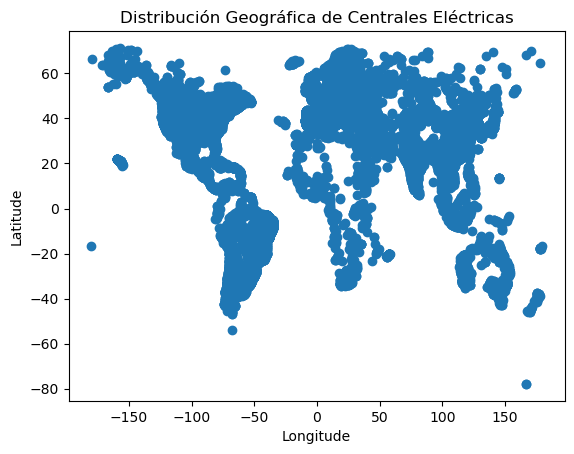

In [15]:
# Gráfico de dispersión para visualizar la distribución geográfica.
plt.scatter(GlobalPowerPlant['Longitude'], GlobalPowerPlant['Latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribución Geográfica de Centrales Eléctricas')
plt.show()


### Valores Faltantes ###

Uno de los enfoques de análisis implica identificar las fuentes de energía con la producción más alta y más baja a nivel global. Para abordar esto, seleccionamos el feature "*Generation GWH 2017*" como referencia. Aunque no es el dato más reciente de producción de energía, es el valor más actual disponible en la columna "*Estimated Generation GWH 2017*". Planeamos utilizar este valor como base para comparaciones en etapas posteriores del análisis.

Al momento de ver el contenido del feature "Generation GWH 2017", nos encontramos con la presencia de valores nulos. Ante esta circunstancia, optamos calcular la media como método para llenar los valores faltantes y así tener aproximación debido a la ausencia de datos importantes.

In [16]:
#Buscamos aquellas columnas que presentan valores faltantes y la cantidad.
GlobalPowerPlant.isna().sum()

Country                               0
Country Long                          0
Name                                  0
Gppd Idnr                             0
Capacity MW                           0
Latitude                              0
Longitude                             0
Primary Fuel                          0
Other Fuel 1                      32992
Other Fuel 2                      34660
Other Fuel 3                      34844
Commissioning Year                    0
Owner                             14068
Source                               15
URL                                  18
Geolocation Source                  419
Wepp ID                           18702
Year of Capacity Data             20049
Generation GWH 2013               28519
Generation GWH 2014               27710
Generation GWH 2015               26733
Generation GWH 2016               25792
Generation GWH 2017               25436
Generation GWH 2018               25299
Generarion GWH 2019               25277


In [17]:
#Vemos un promedio de cuánto representan los valores faltantes.

(GlobalPowerPlant.isna().sum() / GlobalPowerPlant.shape[0] * 100).round(2)

Country                            0.00
Country Long                       0.00
Name                               0.00
Gppd Idnr                          0.00
Capacity MW                        0.00
Latitude                           0.00
Longitude                          0.00
Primary Fuel                       0.00
Other Fuel 1                      94.44
Other Fuel 2                      99.21
Other Fuel 3                      99.74
Commissioning Year                 0.00
Owner                             40.27
Source                             0.04
URL                                0.05
Geolocation Source                 1.20
Wepp ID                           53.53
Year of Capacity Data             57.39
Generation GWH 2013               81.63
Generation GWH 2014               79.32
Generation GWH 2015               76.52
Generation GWH 2016               73.83
Generation GWH 2017               72.81
Generation GWH 2018               72.42
Generarion GWH 2019               72.35


In [18]:
# Identificamos todas las filas del dataset que contienen al menos un valor ausente en alguna de las columnas.
GlobalPowerPlant[GlobalPowerPlant.isna().any(axis=1)]

,Country,Country Long,Name,Gppd Idnr,Capacity MW,Latitude,Longitude,Primary Fuel,Other Fuel 1,Other Fuel 2,...,Estimated Generation GWH 2013,Estimated Generation GWH 2014,Estimated Generation GWH 2015,Estimated Generation GWH 2016,Estimated Generation GWH 2017,Estimated Generation Note 2013,Estimated Generation Note 2014,Estimated Generation Note 2015,Estimated Generation Note 2016,Estimated Generation Note 2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.3220,65.1190,Hydro,<NA>,<NA>,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.6700,65.7950,Solar,<NA>,<NA>,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.6230,65.7920,Solar,<NA>,<NA>,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.5560,69.4787,Hydro,<NA>,<NA>,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.6410,69.7170,Hydro,<NA>,<NA>,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34931,ZMB,Zambia,Ndola,WRI1022386,50.0,-12.9667,28.6333,Oil,<NA>,<NA>,...,NaN,NaN,NaN,NaN,183.79,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34932,ZMB,Zambia,Nkana,WRI1022384,20.0,-12.8167,28.2000,Oil,<NA>,<NA>,...,NaN,NaN,NaN,NaN,73.51,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34933,ZMB,Zambia,Victoria Falls,WRI1022380,108.0,-17.9167,25.8500,Hydro,<NA>,<NA>,...,575.78,575.78,548.94,579.90,578.32,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
34934,ZWE,Zimbabwe,Hwange Coal Power Plant Zimbabwe,GEODB0040404,920.0,-18.3835,26.4700,Coal,<NA>,<NA>,...,NaN,NaN,NaN,NaN,2785.10,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1


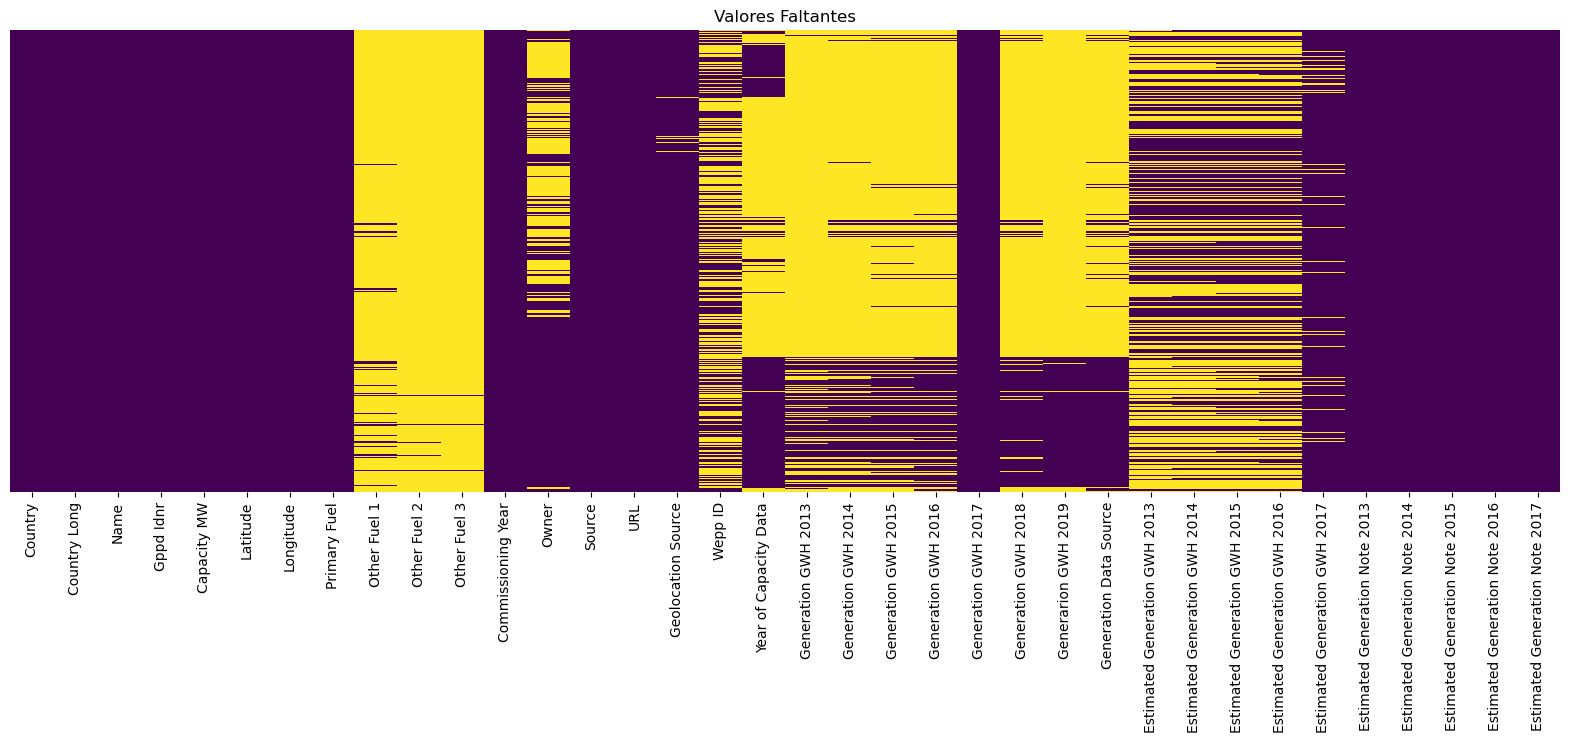

In [40]:
#Gráfico que nos permite visializar los valores null por columna.
plt.figure(figsize=(20, 6))
sns.heatmap(GlobalPowerPlant.isnull(),yticklabels = False, cbar = False, cmap = "viridis")
plt.title("Valores Faltantes")
plt.show()


In [20]:
#Calculamos la media sumando todos los valores de la columna "Generation GWH 2017" y, luego dividimos el resultado entre el número total de valores.

GlobalPowerPlant['Generation GWH 2017'].fillna(GlobalPowerPlant['Generation GWH 2017'].mean(), inplace=True)

In [21]:
#Comprobamos que no haya valores faltantes en el feature "Generation GWH 2017"
GlobalPowerPlant.isna().sum()

Country                               0
Country Long                          0
Name                                  0
Gppd Idnr                             0
Capacity MW                           0
Latitude                              0
Longitude                             0
Primary Fuel                          0
Other Fuel 1                      32992
Other Fuel 2                      34660
Other Fuel 3                      34844
Commissioning Year                    0
Owner                             14068
Source                               15
URL                                  18
Geolocation Source                  419
Wepp ID                           18702
Year of Capacity Data             20049
Generation GWH 2013               28519
Generation GWH 2014               27710
Generation GWH 2015               26733
Generation GWH 2016               25792
Generation GWH 2017                   0
Generation GWH 2018               25299
Generarion GWH 2019               25277


### Outliers ###

In [22]:
#Identificamos cuales son los outliers que observamos en el gráfico anterior de la columna "Capacity MW"
Feature = GlobalPowerPlant['Capacity MW']

# Calculamos los cuartiles y el rango intercuartil (IQR)
Q1 =  GlobalPowerPlant['Capacity MW'].quantile(0.25)
Q3 =  GlobalPowerPlant['Capacity MW'].quantile(0.75)
IQR = Q3 - Q1

# Definimos los límites para identificar outliers
mínima_cantidad = Q1 - 1.5 * IQR
máxima_cantidad = Q3 + 1.5 * IQR

# Filtramos los outliers según la máxima cantidad y la mínima.
Outliers =  GlobalPowerPlant['Capacity MW'][(GlobalPowerPlant['Capacity MW'] < mínima_cantidad) | (GlobalPowerPlant['Capacity MW'] > máxima_cantidad)]

print("Outliers:")
print(Outliers)


Outliers:
10       500.0
11       600.0
15       250.0
19       520.0
27       560.0
         ...  
34922    990.0
34923    930.0
34928    300.0
34934    920.0
34935    750.0
Name: Capacity MW, Length: 5622, dtype: float64


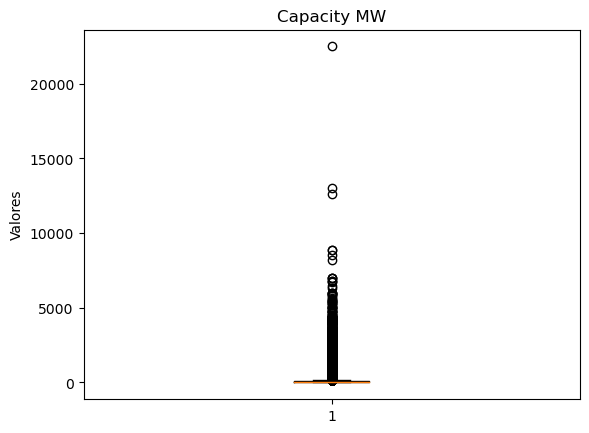

Podemos ver algunos valores que sobresalen, esto significa que algunas plantas tienen una gran capacidad de generación.


In [23]:
#Capacidad de energia en MW (Mega Watts) que tienen las plantas
plt.boxplot(GlobalPowerPlant['Capacity MW'])
plt.title('Capacity MW')
plt.ylabel('Valores')
plt.show()
print("Podemos ver algunos valores que sobresalen, esto significa que algunas plantas tienen una gran capacidad de generación.")

In [24]:
# Parámetros de estadísticas descriptivas por país según la capacidad
capacidad_por_país = GlobalPowerPlant.groupby('Country Long')['Capacity MW'].describe().round()

print(capacidad_por_país)
print("Ejemplo de interpretación de los quartiles para Afghanistan:"
"el 25% de las centrales eléctricas tienen una capacidad de generación igual o menor a 10,"
"el 50% de las centrales eléctricas tienen una capacidad de generación igual o menor a 22,"
"mientras que el 75% de las centrales eléctricas tienen una capacidad de generación igual o menor a 42.")

                count   mean    std    min    25%    50%    75%     max
Country Long                                                           
Afghanistan       9.0   33.0   32.0    6.0   10.0   22.0   42.0   100.0
Albania           8.0  191.0  237.0    5.0   25.0   62.0  312.0   600.0
Algeria          59.0  269.0  334.0    5.0   20.0   74.0  458.0  1200.0
Angola           14.0   77.0  137.0   10.0   15.0   19.0   54.0   520.0
Antarctica        2.0    4.0    4.0    1.0    2.0    4.0    5.0     7.0
...               ...    ...    ...    ...    ...    ...    ...     ...
Vietnam         236.0  175.0  338.0    1.0   10.0   32.0  168.0  2400.0
Western Sahara    1.0   23.0    NaN   23.0   23.0   23.0   23.0    23.0
Yemen             7.0  149.0  122.0   30.0   83.0  139.0  155.0   400.0
Zambia           15.0  179.0  326.0   10.0   15.0   40.0  114.0   990.0
Zimbabwe          2.0  835.0  120.0  750.0  792.0  835.0  878.0   920.0

[167 rows x 8 columns]
Ejemplo de interpretación de los quartil

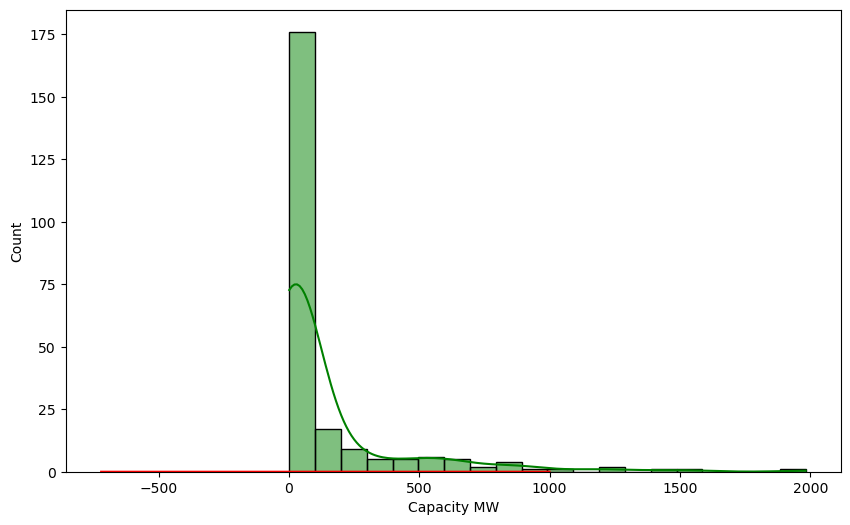

In [25]:
#A continuación realizaremos un gráfico a partir del análisis exploratorio de datos para las capacidades 
#de generación de energía en Argentina.

# Filtramos los datos solo para Argentina
argentina_datos = GlobalPowerPlant[GlobalPowerPlant['Country Long'] == 'Argentina']

# Luego utilizamos el groupby para calcular los parámetros de estadísticas descriptivas por país según la capacidad MW
capacidad_por_país = argentina_datos.groupby('Country Long')['Capacity MW'].describe()

# Realizamos un histograma de la distribución de las capacidades de generación
plt.figure(figsize=(10, 6))
sns.histplot(data=argentina_datos, x='Capacity MW', bins=20, kde=True, color='green', label='Distribución observada')

# Aproximar la curva de distribución normal
mu = capacidad_por_país['mean'].values[0]
sigma = capacidad_por_país['std'].values[0]
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='red', label='Distribución normal')

<Figure size 1200x600 with 0 Axes>

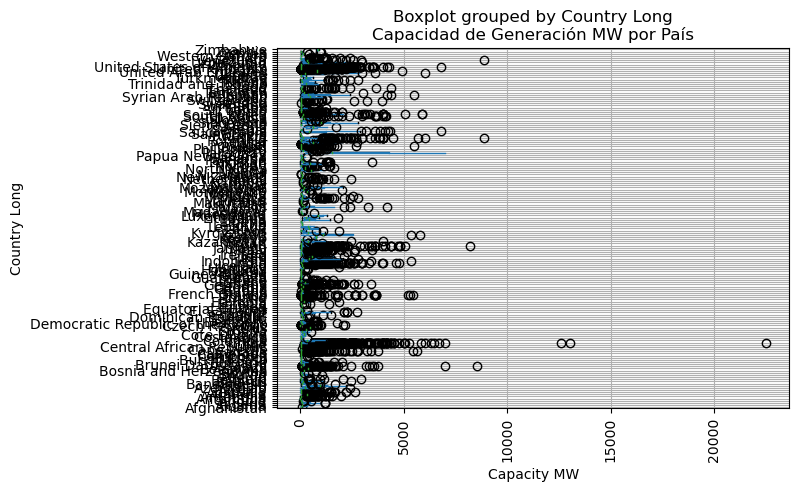

In [26]:
# Diagrama de caja agrupado para la visualización de los outliers por país
plt.figure(figsize=(12, 6))
GlobalPowerPlant.boxplot(column='Capacity MW', by='Country Long', vert=False)
plt.title('Capacidad de Generación MW por País')
plt.xlabel('Capacity MW')
plt.ylabel('Country Long')
plt.xticks(rotation=90)
plt.show()

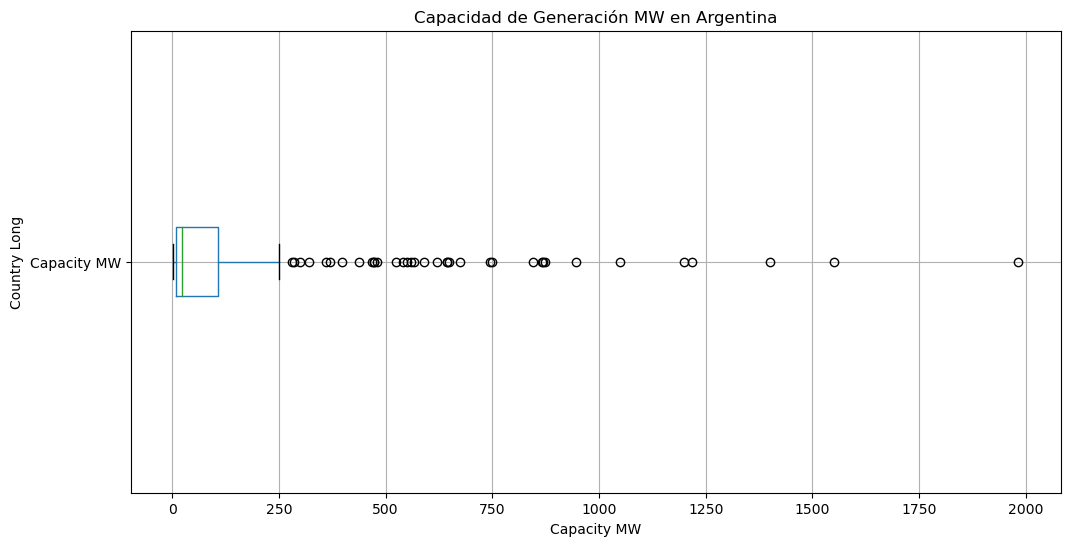

In [35]:
# Diagrama de caja agrupado para la visualización de los outliers solo en Argentina

# Filtramos los datos solo para Argentina
argentina_datos = GlobalPowerPlant[GlobalPowerPlant['Country Long'] == 'Argentina']

# Realizamos el diagrama de caja agrupado para la capacidad de generación en Argentina
plt.figure(figsize=(12, 6))
argentina_data.boxplot(column='Capacity MW', vert=False)
plt.title('Capacidad de Generación MW en Argentina')
plt.xlabel('Capacity MW')
plt.ylabel('Country Long')
plt.show()

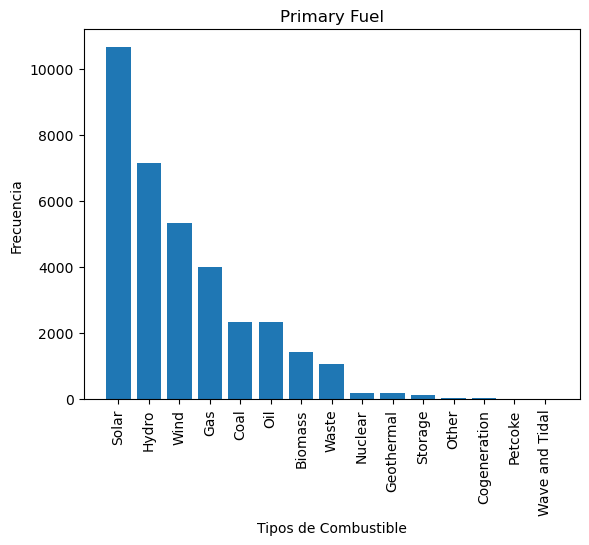

In [28]:
# Visualizamos la columna Primary Fuel para saber cuales son la principales fuentes de energía más generadas

plt.bar(GlobalPowerPlant['Primary Fuel'].value_counts().index, GlobalPowerPlant['Primary Fuel'].value_counts())
plt.title('Primary Fuel')
plt.xlabel('Tipos de Combustible')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X para mayor legibilidad
plt.show()


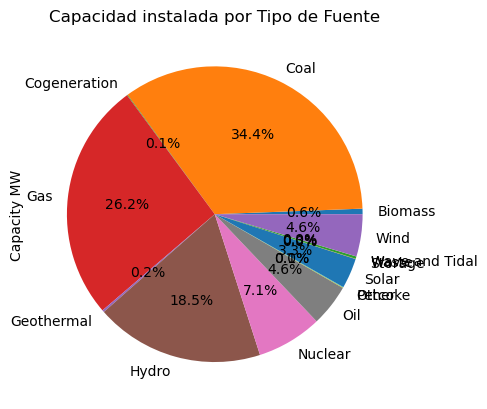

In [29]:
# Calculamos la capacidad total de generación por tipo de fuente de energía
capacity_by_source = GlobalPowerPlant.groupby('Primary Fuel')['Capacity MW'].sum()

# El gráfico muestra la capacidad por tipo de fuente de energía a nivel global
capacity_by_source.plot(kind='pie', autopct='%1.1f%%')
plt.title('Capacidad instalada por Tipo de Fuente')
plt.show()

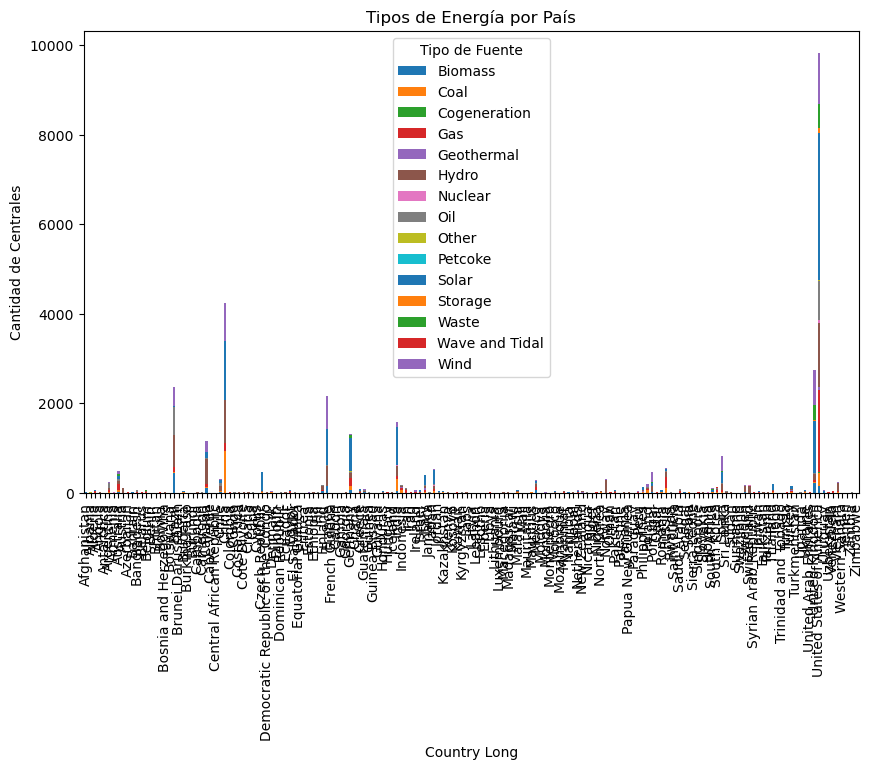

In [30]:
# Agrupamos por país y tipo de fuente de energía, y luego contamos la cantidad de centrales a nivel mundial de cada una
grouped = GlobalPowerPlant.groupby(['Country Long', 'Primary Fuel']).size().unstack()

#Nota de mejora:(Agrupar por continente, agrupar por valores max y min, las que mas producen y menos producen)

# Crear un gráfico de barras apiladas para mostrar los tipos de energía por país
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Country Long')
plt.ylabel('Cantidad de Centrales')
plt.title('Tipos de Energía por País')
plt.legend(title='Tipo de Fuente')
plt.show()

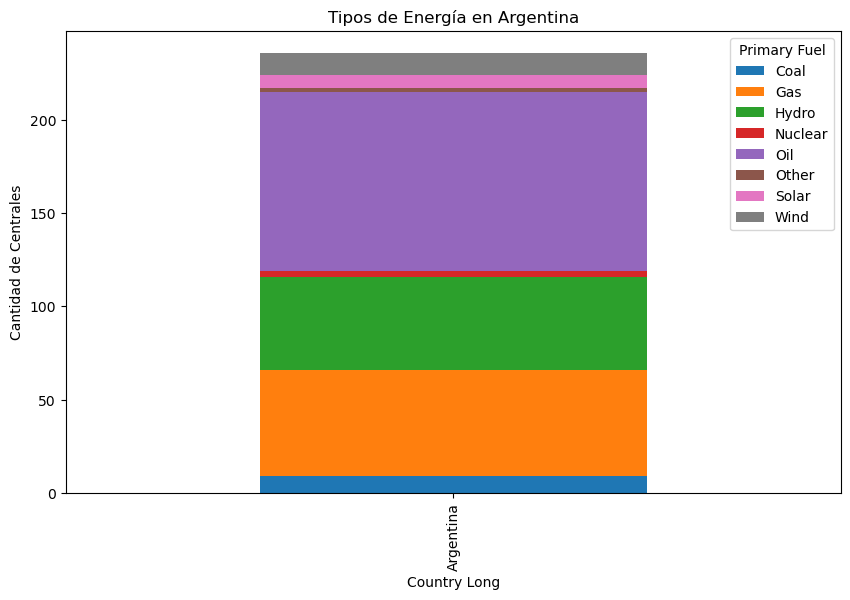

Máximas capacidades por tipo de fuente en Argentina:
Primary Fuel
Coal       1982.20
Gas        1217.70
Hydro      1550.00
Nuclear     745.00
Oil          42.00
Other       845.26
Solar       300.00
Wind         50.00
Name: Capacity MW, dtype: float64

Mínimas capacidades por tipo de fuente en Argentina:
Primary Fuel
Coal        13.200
Gas         10.400
Hydro        2.500
Nuclear    370.000
Oil          1.035
Other      479.200
Solar        1.200
Wind         1.800
Name: Capacity MW, dtype: float64


In [31]:
# Realizamos el mismo gráfico pero filtrando solo Argentina
argentina_data = GlobalPowerPlant[GlobalPowerPlant['Country Long'] == 'Argentina']

# # Agrupamos por país y tipo de fuente de energía, y luego contamos la cantidad de centrales de cada una
grouped_argentina = argentina_data.groupby(['Country Long', 'Primary Fuel']).size().unstack()

# Calculamos el máximo y mínimo de capacidad de generación para cada tipo de fuente en Argentina
max_capacity = argentina_data.groupby('Primary Fuel')['Capacity MW'].max()
min_capacity = argentina_data.groupby('Primary Fuel')['Capacity MW'].min()

# Seleccionamos un gráfico de barras apiladas para mostrar los tipos de energía en Argentina
grouped_argentina.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Country Long')
plt.ylabel('Cantidad de Centrales')
plt.title('Tipos de Energía en Argentina')
plt.legend(title='Primary Fuel')
plt.show()

# Por último, imprimimos los valores máximos y mínimos de capacidad de generación por tipo de fuente en Argentina
print("Máximas capacidades por tipo de fuente en Argentina:")
print(max_capacity)
print("\nMínimas capacidades por tipo de fuente en Argentina:")
print(min_capacity)


In [32]:
#Calculamos cuál fue la planta de energía que más produjo en el 2017

maxima_energia = GlobalPowerPlant.loc[GlobalPowerPlant['Generation GWH 2017'].idxmax()]

print("Planta que produce más energía:")
print("País:", maxima_energia['Country Long'])
print("Planta:", maxima_energia['Name'])
print("Tipo de combustible:", maxima_energia['Primary Fuel'])
print("Cantidad de energía producida:", maxima_energia['Generation GWH 2017'])


Planta que produce más energía:
País: France
Planta: CATTENOM
Tipo de combustible: Nuclear
Cantidad de energía producida: 36448.643


In [33]:
#Calculamos cuál fue la planta de energía que menos produjo en el 2017

minimo_energia = GlobalPowerPlant.loc[GlobalPowerPlant['Generation GWH 2017'].idxmin()]

print("Planta que produce menos energía:")
print("País:", minimo_energia['Country Long'])
print("Planta:", minimo_energia['Name'])
print("Tipo de combustible:", minimo_energia['Primary Fuel'])
print("Cantidad de energía producida:", minimo_energia['Generation GWH 2017'])

Planta que produce menos energía:
País: United States of America
Planta: Bath County
Tipo de combustible: Hydro
Cantidad de energía producida: -934.944
